In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
import sys

In [3]:
#load data
x = []
t = []
for i in range(0,5):
    #print(i)
    for j in range(0,64):
        img = cv.imread('./Fashion_MNIST/{i}/{j}.png'.format(i = i,j = j),cv.IMREAD_GRAYSCALE)
        #print(img.shape)
        t.append(i)
        x.append(img.flatten()/255)

In [4]:
#one hot
t_1 = []
for i in t:
    tmp = np.zeros((5))
    #print(tmp[i])
    tmp[i] = tmp[i] + 1
    #print(tmp)
    t_1.append(tmp)

In [5]:
#split data to train & test
bound = int(len(x)/5)
x_class = []
t_class = []
x_train = []
x_test = []
t_train = []
t_test = []
x_tmp1 = []
x_tmp2 = []
t_tmp1 = []
t_tmp2 = []
x_train1 = []
x_test1 = []
t_train1 = []
t_test1 = []

        

for i in range(0,5):
    x_class.append(x[i*bound:i*bound+bound])
    t_class.append(t_1[i*bound:i*bound+bound])
    

for i in range(0,5):
    x_tmp1.append(x_class[i][0:32])
    t_tmp1.append(t_class[i][0:32])
    x_tmp2.append(x_class[i][32:64])
    t_tmp2.append(t_class[i][32:64])
for i in range(0,5):
    for j in range(0,len(x_tmp1[0])):
        x_train.append(x_tmp1[i][j])
        x_test.append(x_tmp2[i][j])
        t_train.append(t_tmp1[i][j])
        t_test.append(t_tmp2[i][j])
#print(len(x_test))

n = [i for i in range(160)]
random.seed(10)
random.shuffle(n)

for i in range(0,len(n)):
    x_train1.append(x_train[n[i]])
    t_train1.append(t_train[n[i]])
    x_test1.append(x_test[n[i]])
    t_test1.append(t_test[n[i]])


x_train = x_train1
x_test = x_test1
t_train = t_train1
t_test = t_test1

In [6]:
def int_weight(dim):
    w = np.zeros((5,dim))
    return w

In [7]:
def softmax_y(w,x,batch_size):
    ####
    b = batch_size
    y_e_tmp = []
    y_predict = []
    y_e_sum = []

    y = np.dot(x,w.T) #32x5
    #print(y[0])

    for i in range(0,len(y)):
        tmp = []
        for j in range(0,5):
            tmp.append(math.exp(y[i][j]))
        y_e_tmp.append(tmp)
    y_e_tmp = np.array(y_e_tmp) #32x5
    
    for i in range(0,len(y)):
        tmp = y_e_tmp[i].sum()
        y_e_sum.append(tmp)
    y_e_sum = np.array(y_e_sum) #32x1

    for i in range(0,len(y_e_sum)):
        tmp = []
        for j in range(0,5):
            r = y_e_tmp[i][j]/y_e_sum[i]
            tmp.append(r)
        y_predict.append(tmp)
    y_predict = np.array(y_predict)

    #print(y_predict)

    #batch_size個 1x5輸出
    return y_predict

In [8]:
def softmax_y_sgd(w,x):
    ####
    y_e_tmp = []
    y_predict = []
    y_e_sum = []

    y = np.dot(x,w.T) #1x5

    for i in range(0,5):
        y_e_tmp.append(math.exp(y[i]))
    y_e_tmp = np.array(y_e_tmp) #1x5 
    
    y_e_sum = y_e_tmp.sum()

    for j in range(0,5):
        r = y_e_tmp[j]/y_e_sum
        y_predict.append(r)
    y_predict = np.array(y_predict)

    #print(y_predict)
    #1個 1x5輸出
    return y_predict

In [9]:
def loss(y,t):
    #y為predict y(numpy),t為label(numpy)
    e = []
    y_log = []
    t = np.array(t)
    
    for i in range(0,len(y)):
        tmp = []
        for j in range(0,5):
            a = math.log(y[i][j])
            tmp.append(a)
        y_log.append(tmp)
    y_log = np.array(y_log)
    
    for i in range(0,len(y)):
        index = np.argwhere(t[i] == 1)
        tmp1 = y_log[i][index]
        e.append(tmp1)
    
    e = np.array(e)
    loss = - (e.sum())
    return loss

In [10]:
def update_weight(x,y,w,t,lr):
    
    #x.shape = 32x784
    
    e = y - t
    #print(e)
    #32x5
    #e = np.array(e)

    e_div = np.dot(e.T,x)
    
    #print(e_div.shape) = 5x784
    
    w_update = w - np.dot(lr,e_div)

    return w_update

In [11]:
#logistic regression
def logistic_regression_train(w,x,t,batch_size,epoch,x_test,t_test,lr):
    b = batch_size
    loss_list = []
    acc_list = []
    acc_list_test = []
    loss_list_test = []
    result_list = []

    x = np.array(x)
    t = np.array(t)
    x_test = np.array(x_test)
    t_test = np.array(t_test)
    for ep in range(0,epoch):
        acc = 0
        acc_test = 0

        for it in range(0,int(len(x)/b)):
            xx = np.array(x[it*b:it*b+b])
            tt = np.array(t[it*b:it*b+b])
            y = softmax_y(w,xx,b)
            w = update_weight(xx,y,w,tt,lr)
        
        #train acc
        y_train_result = softmax_y(w,x,b)
        for i in range(0,len(y_train_result)):
            t_index = np.argmax(t[i])
            y_index = np.argmax(y_train_result[i])
            #print(t_index,y_index)
            if (t_index) == (y_index) :
                acc += 1
        #print(acc)
        acc_list.append((acc)/len(x))
        
        #train loss   
        err = loss(y_train_result,t)
        loss_list.append(err)
        #print("Train Epoch:",(ep),", Train Loss =",err)
        
        #test acc
        y_test_result = softmax_y(w,x_test,b)
        for i in range(0,len(y_test_result)):
            t_index_test = np.argmax(t_test[i])
            y_index_test = np.argmax(y_test_result[i])
            if (t_index_test) == (y_index_test):
                acc_test += 1
        #print(acc_test)
        acc_list_test.append(acc_test/len(x))
        
        #test loss   

        err_test = loss(y_test_result,t_test)
        loss_list_test.append(err_test)
        #print("Test Epoch:",(ep),", Test Loss =",err_test)
        
        
    result_list.append(acc_list)
    result_list.append(loss_list)
    result_list.append(acc_list_test)
    result_list.append(loss_list_test)
    
    
    #acc_list , loos_list 長度皆為 epoch 數
    #result_list中第一個存的是train正確率 第二個為train loss 第三個為test acc 第四個為test loss
    
    return result_list

In [12]:
def logistic_regression_sgd(w,x,t,batch_size,epoch,x_test,t_test,lr):
    b = batch_size
    loss_list = []
    acc_list = []
    acc_list_test = []
    loss_list_test = []
    result_list = []

    x = np.array(x)
    t = np.array(t)
    x_test = np.array(x_test)
    t_test = np.array(t_test)
    for ep in range(0,epoch):
        acc = 0
        acc_test = 0

        for it in range(0,len(x)):
            xx = np.array(x[it])
            tt = np.array(t[it])
            #print(tt)
            y = softmax_y_sgd(w,xx)

            e = y - tt
            
            e = np.array(e)
            e_div = []
            for i in range(0,len(e)):
                e_div.append(e[i]*xx)
            e_div = np.array(e_div)
            #print(e_div)
            w = w - np.dot(lr,e_div)
        
        #train acc
        
        y_train = softmax_y(w,x,b)
        
        for i in range(0,len(y_train)):
            t_index = np.argmax(t[i])
            y_index = np.argmax(y_train[i])
            #print(t_index,y_index)
            if (t_index) == (y_index) :
                acc += 1
        #print(acc)
        acc_list.append((acc)/len(x))
        
        #train loss   
        err = loss(y_train,t)
        loss_list.append(err)
        #print("Train Epoch:",(ep),", Train Loss =",err)
        
        #test acc
        y_test_result = softmax_y(w,x_test,b)
        for i in range(0,len(y_test_result)):
            t_index_test = np.argmax(t_test[i])
            y_index_test = np.argmax(y_test_result[i])
            if (t_index_test) == (y_index_test):
                acc_test += 1
        #print(acc_test)
        acc_list_test.append(acc_test/len(x))
        
        #test loss   

        err_test = loss(y_test_result,t_test)
        loss_list_test.append(err_test)
        #print("Test Epoch:",(ep),", Test Loss =",err_test)
        
        
    result_list.append(acc_list)
    result_list.append(loss_list)
    result_list.append(acc_list_test)
    result_list.append(loss_list_test)
    
    
    #acc_list , loos_list 長度皆為 epoch 數
    #result_list中第一個存的是train正確率 第二個為train loss 第三個為test acc 第四個為test loss
    
    return result_list

In [67]:
def logistic_regression_nt(w,x,t,x_test,t_test,batch_size,epoch):
    b = batch_size
    loss_list = []
    acc_list = []
    acc_list_test = []
    loss_list_test = []
    result_list = []
    w_list = []

    x = np.array(x)
    t = np.array(t)
    x_test = np.array(x_test)
    t_test = np.array(t_test)
        

    for ep in range(0,epoch):
        acc = 0
        acc_test = 0

        y = softmax_y(w,x,b)
        #train acc
        #y_train_result = softmax_y(w,x,b)
        for i in range(0,len(y)):
            t_index = np.argmax(t[i])
            y_index = np.argmax(y[i])
            #print(t_index,y_index)
            if (t_index) == (y_index) :
                acc += 1
        #print(acc)
        acc_list.append((acc)/len(x))
        
        #train loss   
        err = loss(y,t)
        loss_list.append(err)
        #print("Train Epoch:",(ep),", Train Loss =",err)
        
        #test acc
        y_test_result = softmax_y(w,x_test,b)
        for i in range(0,len(y_test_result)):
            t_index_test = np.argmax(t_test[i])
            y_index_test = np.argmax(y_test_result[i])
            if (t_index_test) == (y_index_test):
                acc_test += 1
        #print(acc_test)
        acc_list_test.append(acc_test/len(x))
        
        #test loss   

        err_test = loss(y_test_result,t_test)
        loss_list_test.append(err_test)
        #print("Test Epoch:",(ep),", Test Loss =",err_test)
        
        
        #開始牛頓法更新
        #y = softmax_y(w,x,b)
        y_k = []
        y_j = []
        xx = np.dot(x.T,x)
        for k in range(0,5):
            tmp = y.T[k]
            y_k.append(tmp)
            y_j.append(tmp)
        y_k = np.array(y_k)
        y_j = np.array(y_j)
        
        #print(y_k[0])
        #I = np.identity(160)
        e = y - t


        e_div = np.dot(e.T,x)
        #delta = loss(y,t)
        
        H = []
        for k in range(0,5):
            aa = 1-y_j[k]
            #print(aa.shape,y_k[k].shape)
            
            bb = np.dot(y_k[k],aa)
            #print(bb)
            
            H.append(bb*xx)
        #print(len(H))
        H_matrix = H[0]+H[1]+H[2]+H[3]+H[4]
        H_inv = np.linalg.pinv(H_matrix)
        #print(delta.shape,H_inv.shape)
        w = w - np.dot(e_div,H_inv)
    w_list.append(w)
    
    result_list.append(acc_list)
    result_list.append(loss_list)
    result_list.append(acc_list_test)
    result_list.append(loss_list_test)
    result_list.append(w_list)
    return result_list

In [14]:
def logistic_regression_GD(w,x,t,batch_size,epoch,x_test,t_test,lr):
    b = batch_size
    loss_list = []
    acc_list = []
    acc_list_test = []
    loss_list_test = []
    result_list = []

    x = np.array(x)
    t = np.array(t)
    x_test = np.array(x_test)
    t_test = np.array(t_test)
    for ep in range(0,epoch):
        acc = 0
        acc_test = 0

        y = softmax_y(w,x,b)
        w = update_weight(x,y,w,t,lr)
        
        #train acc
        #y_train_result = softmax_y(w,x,b)
        for i in range(0,len(y)):
            t_index = np.argmax(t[i])
            y_index = np.argmax(y[i])
            #print(t_index,y_index)
            if (t_index) == (y_index) :
                acc += 1
        #print(acc)
        acc_list.append((acc)/b)
        
        #train loss   
        err = loss(y,t)
        loss_list.append(err)
        #print("Train Epoch:",(ep),", Train Loss =",err)
        
        #test acc
        y_test_result = softmax_y(w,x_test,b)
        for i in range(0,len(y_test_result)):
            t_index_test = np.argmax(t_test[i])
            y_index_test = np.argmax(y_test_result[i])
            if (t_index_test) == (y_index_test):
                acc_test += 1
        #print(acc_test)
        acc_list_test.append(acc_test/b)
        
        #test loss   

        err_test = loss(y_test_result,t_test)
        loss_list_test.append(err_test)
        #print("Test Epoch:",(ep),", Test Loss =",err_test)
        
        
    result_list.append(acc_list)
    result_list.append(loss_list)
    result_list.append(acc_list_test)
    result_list.append(loss_list_test)
    
    
    #acc_list , loos_list 長度皆為 epoch 數
    #result_list中第一個存的是train正確率 第二個為train loss 第三個為test acc 第四個為test loss
    
    return result_list

# GD without PCA

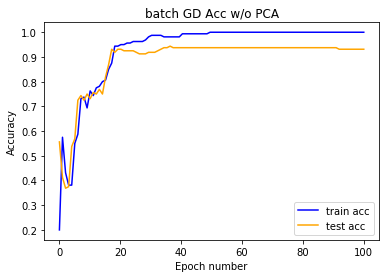

TYPE: batch GD Acc w/o PCA
Training ACC: 1.0
Test ACC: 0.93125


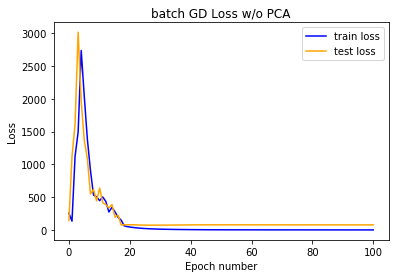

In [15]:
result_list_GD = logistic_regression_GD(w =int_weight(784) ,x= x_train,t = t_train,batch_size = 160,epoch = 100,x_test = x_test,t_test = t_test,lr = 0.005)
epgd = np.linspace(0,100,100)

plt.plot(epgd,result_list_GD[0],color = 'blue',label = 'train acc')
plt.plot(epgd,result_list_GD[2],color = 'orange',label = 'test acc')
plt.title('batch GD Acc w/o PCA')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: batch GD Acc w/o PCA')
print('Training ACC:',result_list_GD[0][-1])
print('Test ACC:',result_list_GD[2][-1])


plt.plot(epgd,result_list_GD[1],color = 'blue',label = 'train loss')
plt.plot(epgd,result_list_GD[3],color = 'orange',label = 'test loss')
plt.title('batch GD Loss w/o PCA')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SGD without PCA

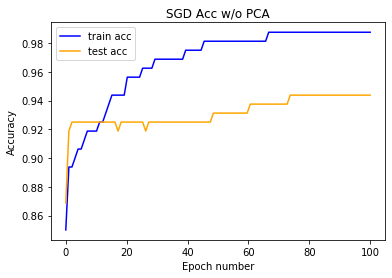

TYPE: SGD Acc w/o PCA
Training ACC: 0.9875
Test ACC: 0.94375


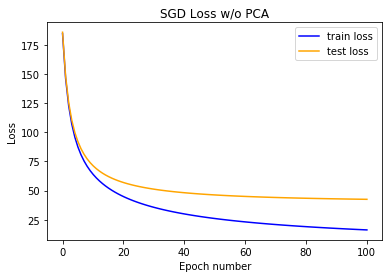

In [16]:
result_list_SGD = logistic_regression_sgd(w = int_weight(784),x = x_train,t = t_train,batch_size = 1,epoch = 100 ,x_test = x_test ,t_test = t_test,lr = 0.0008)
epsgd = np.linspace(0,100,100)
plt.plot(epsgd,result_list_SGD[0],color = 'blue',label = 'train acc')
plt.plot(epsgd,result_list_SGD[2],color = 'orange',label = 'test acc')
plt.title('SGD Acc w/o PCA')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: SGD Acc w/o PCA')
print('Training ACC:',result_list_SGD[0][-1])
print('Test ACC:',result_list_SGD[2][-1])

plt.plot(epsgd,result_list_SGD[1],color = 'blue',label = 'train loss')
plt.plot(epsgd,result_list_SGD[3],color = 'orange',label = 'test loss')
plt.title('SGD Loss w/o PCA')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Mini-Batch without PCA

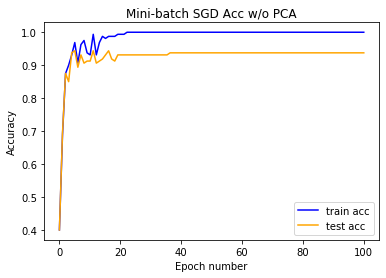

TYPE: Mini-batch SGD Acc w/o PCA
Training ACC: 1.0
Test ACC: 0.9375


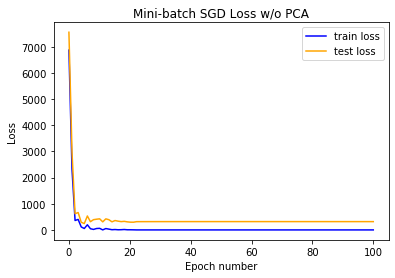

In [17]:
result_list_minibatch = logistic_regression_train(w = int_weight(784),x = x_train,t = t_train,batch_size = 32,epoch = 100 ,x_test = x_test ,t_test = t_test,lr = 0.08)
epmini = np.linspace(0,100,100)
plt.plot(epmini,result_list_minibatch[0],color = 'blue',label = 'train acc')
plt.plot(epmini,result_list_minibatch[2],color = 'orange',label = 'test acc')
plt.title('Mini-batch SGD Acc w/o PCA')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: Mini-batch SGD Acc w/o PCA')
print('Training ACC:',result_list_minibatch[0][-1])
print('Test ACC:',result_list_minibatch[2][-1])

plt.plot(epmini,result_list_minibatch[1],color = 'blue',label = 'train loss')
plt.plot(epmini,result_list_minibatch[3],color = 'orange',label = 'test loss')
plt.title('Mini-batch SGD Loss w/o PCA')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Newton without PCA

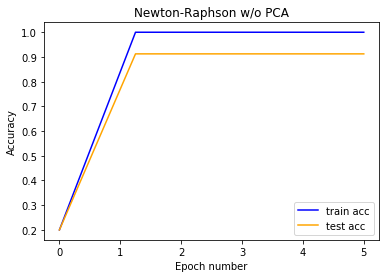

TYPE: Newton-Raphson w/o PCA
Training ACC: 1.0
Test ACC: 0.9125


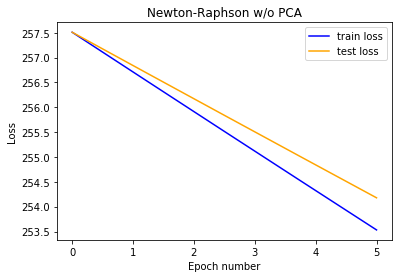

In [18]:
# Newton
result_list_nt = logistic_regression_nt(w = int_weight(784),x = x_train,t = t_train,x_test = x_test,t_test = t_test,batch_size = 160,epoch =5)
epnt = np.linspace(0,5,5)

plt.plot(epnt,result_list_nt[0],color = 'blue',label = 'train acc')
plt.plot(epnt,result_list_nt[2],color = 'orange',label = 'test acc')
plt.title('Newton-Raphson w/o PCA')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: Newton-Raphson w/o PCA')
print('Training ACC:',result_list_nt[0][-1])
print('Test ACC:',result_list_nt[2][-1])

plt.plot(epnt,result_list_nt[1],color = 'blue',label = 'train loss')
plt.plot(epnt,result_list_nt[3],color = 'orange',label = 'test loss')
plt.title('Newton-Raphson w/o PCA')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

# PCA

In [19]:
def get_top_d_eigvector(data,d):
    data = np.array(data)
    x = data.reshape((160,784))
    m = np.mean(x,axis=0)
    x = x - m
    cov_matrix = np.cov(x.T)
    U,sigma,vt = np.linalg.svd(cov_matrix)
    e_vector = vt[0:d]
    e_vector = e_vector.real
    return e_vector

In [20]:
def get_eigvector(data,d):
    data = np.array(data)
    x = data.reshape((160,784))
    m = np.mean(x,axis=0)
    x = x - m
    cov_matrix = np.cov(x.T)
    e_value, e_vector = np.linalg.eig(cov_matrix)
    ev = e_vector[:,0:d]
    return ev.real

In [21]:
def PCA(data,e_vector,d):
    data = np.array(data)
    x = data.reshape((160,784))
    x = np.dot(x, e_vector)
    x = x.real
    for i in range(0,d):
        Max = np.max(x[:,i])
        Min = np.min(x[:,i])
        R = Max - Min
        x[:,i] = x[:,i] - Min
        x[:,i] = x[:,i] / float(R)
    x = x.reshape((160,1,d))
    return x

In [22]:
#X PCA in d = 2, 5, 10
#d = 2
d = 2
ev_train = get_eigvector(x_train,d)
x_train_d2a = PCA(x_train,ev_train,d)
x_test_d2a = PCA(x_test,ev_train,d)

#d = 5
d = 5
ev_train = get_eigvector(x_train,d)
x_train_d5a = PCA(x_train,ev_train,d)
x_test_d5a = PCA(x_test,ev_train,d)

#d = 10
d = 10
ev_train = get_eigvector(x_train,d)
x_train_d10a = PCA(x_train,ev_train,d)
x_test_d10a = PCA(x_test,ev_train,d)

x_train_d2 = []
x_train_d5 = []
x_train_d10 = []
x_test_d2 = []
x_test_d5 = []
x_test_d10 = []

for i in range(0,160):
    for j in range(0,1):
        x_train_d2.append(x_train_d2a[i][j])
for i in range(0,160):
    for j in range(0,1):
        x_test_d2.append(x_test_d2a[i][j])
for i in range(0,160):
    for j in range(0,1):
        x_train_d5.append(x_train_d5a[i][j])
for i in range(0,160):
    for j in range(0,1):
        x_test_d5.append(x_test_d5a[i][j])
for i in range(0,160):
    for j in range(0,1):
        x_train_d10.append(x_train_d10a[i][j])
        
for i in range(0,160):
    for j in range(0,1):
        x_test_d10.append(x_test_d10a[i][j])

# GD with PCA

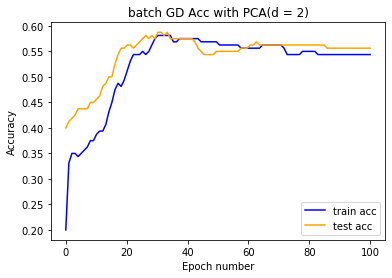

TYPE: batch GD Acc with PCA(d = 2)
Training ACC: 0.54375
Test ACC: 0.55625


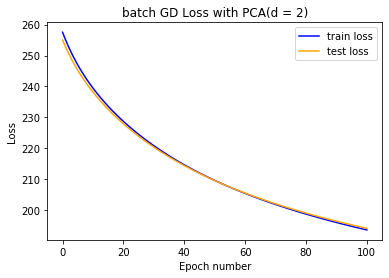

In [23]:
#d = 2
result_list_GD = logistic_regression_GD(w = int_weight(2),x= x_train_d2,t = t_train,batch_size = 160,epoch = 100,x_test = x_test_d2,t_test = t_test,lr = 0.005)
epgd = np.linspace(0,100,100)

plt.plot(epgd,result_list_GD[0],color = 'blue',label = 'train acc')
plt.plot(epgd,result_list_GD[2],color = 'orange',label = 'test acc')
plt.title('batch GD Acc with PCA(d = 2)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: batch GD Acc with PCA(d = 2)')
print('Training ACC:',result_list_GD[0][-1])
print('Test ACC:',result_list_GD[2][-1])

plt.plot(epgd,result_list_GD[1],color = 'blue',label = 'train loss')
plt.plot(epgd,result_list_GD[3],color = 'orange',label = 'test loss')
plt.title('batch GD Loss with PCA(d = 2)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

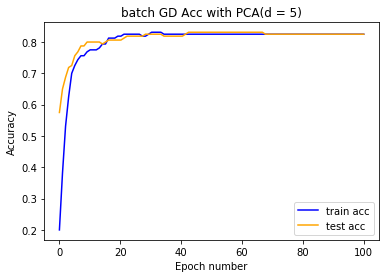

TYPE: batch GD Acc with PCA(d = 5)
Training ACC: 0.825
Test ACC: 0.825


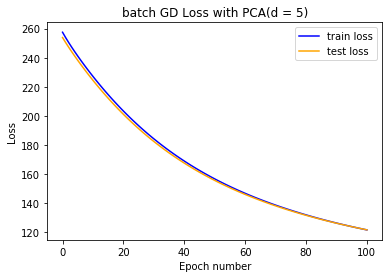

In [24]:
#d = 5
result_list_GD = logistic_regression_GD(w = int_weight(5),x= x_train_d5,t = t_train,batch_size = 160,epoch = 100,x_test = x_test_d5,t_test = t_test,lr = 0.005)
epgd = np.linspace(0,100,100)

plt.plot(epgd,result_list_GD[0],color = 'blue',label = 'train acc')
plt.plot(epgd,result_list_GD[2],color = 'orange',label = 'test acc')
plt.title('batch GD Acc with PCA(d = 5)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: batch GD Acc with PCA(d = 5)')
print('Training ACC:',result_list_GD[0][-1])
print('Test ACC:',result_list_GD[2][-1])


plt.plot(epgd,result_list_GD[1],color = 'blue',label = 'train loss')
plt.plot(epgd,result_list_GD[3],color = 'orange',label = 'test loss')
plt.title('batch GD Loss with PCA(d = 5)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

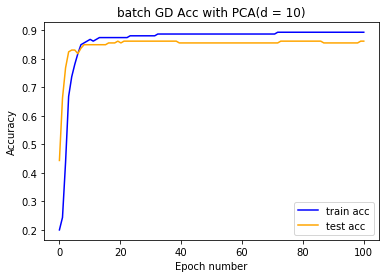

TYPE: batch GD Acc with PCA(d = 10)
Training ACC: 0.89375
Test ACC: 0.8625


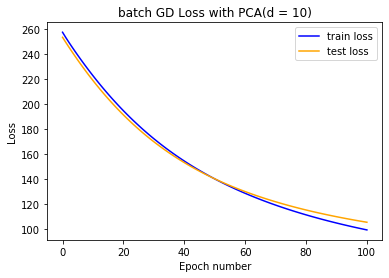

In [25]:
#d = 10
result_list_GD = logistic_regression_GD(w = int_weight(10),x= x_train_d10,t = t_train,batch_size = 160,epoch = 100,x_test = x_test_d10,t_test = t_test,lr = 0.005)
epgd = np.linspace(0,100,100)

plt.plot(epgd,result_list_GD[0],color = 'blue',label = 'train acc')
plt.plot(epgd,result_list_GD[2],color = 'orange',label = 'test acc')
plt.title('batch GD Acc with PCA(d = 10)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: batch GD Acc with PCA(d = 10)')
print('Training ACC:',result_list_GD[0][-1])
print('Test ACC:',result_list_GD[2][-1])


plt.plot(epgd,result_list_GD[1],color = 'blue',label = 'train loss')
plt.plot(epgd,result_list_GD[3],color = 'orange',label = 'test loss')
plt.title('batch GD Loss with PCA(d = 10)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SGD with PCA

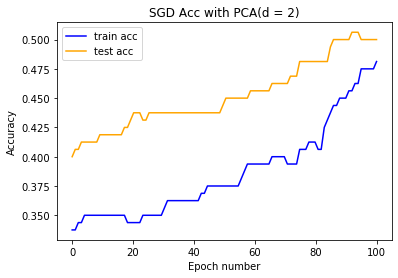

TYPE: SGD Acc with PCA(d = 2)
Training ACC: 0.48125
Test ACC: 0.5


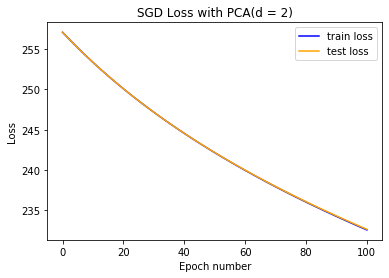

In [26]:
#d = 2
result_list_SGD = logistic_regression_sgd(w = int_weight(2),x = x_train_d2,t = t_train,batch_size = 1,epoch = 100 ,x_test = x_test_d2 ,t_test = t_test,lr = 0.0008)

epsgd = np.linspace(0,100,100)
plt.plot(epsgd,result_list_SGD[0],color = 'blue',label = 'train acc')
plt.plot(epsgd,result_list_SGD[2],color = 'orange',label = 'test acc')
plt.title('SGD Acc with PCA(d = 2)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: SGD Acc with PCA(d = 2)')
print('Training ACC:',result_list_SGD[0][-1])
print('Test ACC:',result_list_SGD[2][-1])

plt.plot(epsgd,result_list_SGD[1],color = 'blue',label = 'train loss')
plt.plot(epsgd,result_list_SGD[3],color = 'orange',label = 'test loss')
plt.title('SGD Loss with PCA(d = 2)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

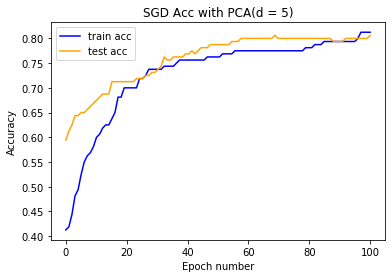

TYPE: SGD Acc with PCA(d = 5)
Training ACC: 0.8125
Test ACC: 0.80625


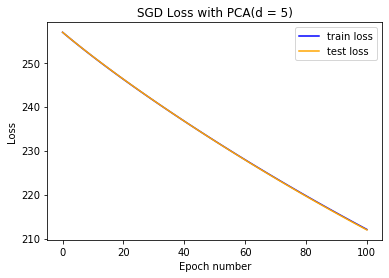

In [27]:
#d = 5
result_list_SGD = logistic_regression_sgd(w = int_weight(5),x = x_train_d5,t = t_train,batch_size = 1,epoch = 100 ,x_test = x_test_d5 ,t_test = t_test,lr = 0.0008)

epsgd = np.linspace(0,100,100)
plt.plot(epsgd,result_list_SGD[0],color = 'blue',label = 'train acc')
plt.plot(epsgd,result_list_SGD[2],color = 'orange',label = 'test acc')
plt.title('SGD Acc with PCA(d = 5)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: SGD Acc with PCA(d = 5)')
print('Training ACC:',result_list_SGD[0][-1])
print('Test ACC:',result_list_SGD[2][-1])

plt.plot(epsgd,result_list_SGD[1],color = 'blue',label = 'train loss')
plt.plot(epsgd,result_list_SGD[3],color = 'orange',label = 'test loss')
plt.title('SGD Loss with PCA(d = 5)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

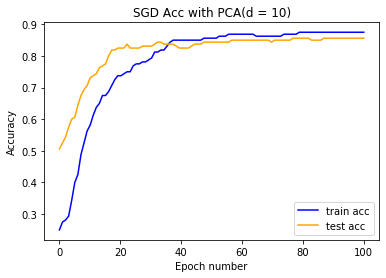

TYPE: SGD Acc with PCA(d = 10)
Training ACC: 0.875
Test ACC: 0.85625


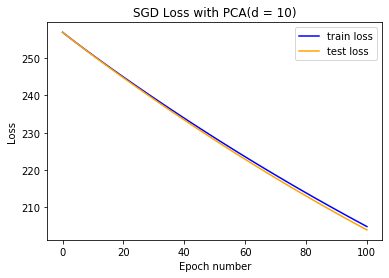

In [28]:
#d = 10
result_list_SGD = logistic_regression_sgd(w = int_weight(10),x = x_train_d10,t = t_train,batch_size = 1,epoch = 100 ,x_test = x_test_d10 ,t_test = t_test,lr = 0.0008)

epsgd = np.linspace(0,100,100)
plt.plot(epsgd,result_list_SGD[0],color = 'blue',label = 'train acc')
plt.plot(epsgd,result_list_SGD[2],color = 'orange',label = 'test acc')
plt.title('SGD Acc with PCA(d = 10)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: SGD Acc with PCA(d = 10)')
print('Training ACC:',result_list_SGD[0][-1])
print('Test ACC:',result_list_SGD[2][-1])

plt.plot(epsgd,result_list_SGD[1],color = 'blue',label = 'train loss')
plt.plot(epsgd,result_list_SGD[3],color = 'orange',label = 'test loss')
plt.title('SGD Loss with PCA(d = 10)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Mini-Batch with PCA

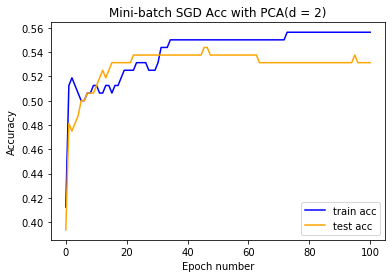

TYPE: Mini-batch SGD Acc with PCA(d = 2)
Training ACC: 0.55625
Test ACC: 0.53125


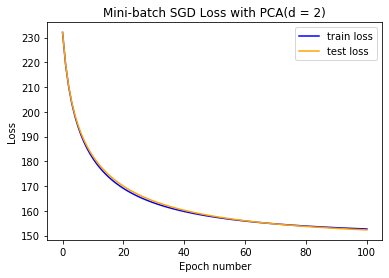

In [29]:
#d = 2
result_list_minibatch = logistic_regression_train(w = int_weight(2),x = x_train_d2,t = t_train,batch_size = 32,epoch = 100 ,x_test = x_test_d2 ,t_test = t_test,lr = 0.08)
epmini = np.linspace(0,100,100)
plt.plot(epmini,result_list_minibatch[0],color = 'blue',label = 'train acc')
plt.plot(epmini,result_list_minibatch[2],color = 'orange',label = 'test acc')
plt.title('Mini-batch SGD Acc with PCA(d = 2)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: Mini-batch SGD Acc with PCA(d = 2)')
print('Training ACC:',result_list_minibatch[0][-1])
print('Test ACC:',result_list_minibatch[2][-1])

plt.plot(epmini,result_list_minibatch[1],color = 'blue',label = 'train loss')
plt.plot(epmini,result_list_minibatch[3],color = 'orange',label = 'test loss')
plt.title('Mini-batch SGD Loss with PCA(d = 2)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

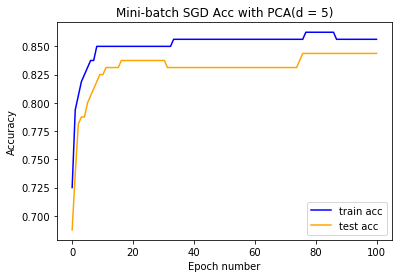

TYPE: Mini-batch SGD Acc with PCA(d = 5)
Training ACC: 0.85625
Test ACC: 0.84375


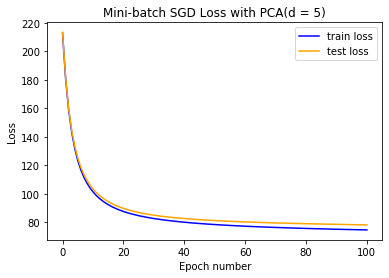

In [30]:
#d = 5
result_list_minibatch = logistic_regression_train(w = int_weight(5),x = x_train_d5,t = t_train,batch_size = 32,epoch = 100 ,x_test = x_test_d5 ,t_test = t_test,lr = 0.08)
epmini = np.linspace(0,100,100)
plt.plot(epmini,result_list_minibatch[0],color = 'blue',label = 'train acc')
plt.plot(epmini,result_list_minibatch[2],color = 'orange',label = 'test acc')
plt.title('Mini-batch SGD Acc with PCA(d = 5)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: Mini-batch SGD Acc with PCA(d = 5)')
print('Training ACC:',result_list_minibatch[0][-1])
print('Test ACC:',result_list_minibatch[2][-1])

plt.plot(epmini,result_list_minibatch[1],color = 'blue',label = 'train loss')
plt.plot(epmini,result_list_minibatch[3],color = 'orange',label = 'test loss')
plt.title('Mini-batch SGD Loss with PCA(d = 5)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

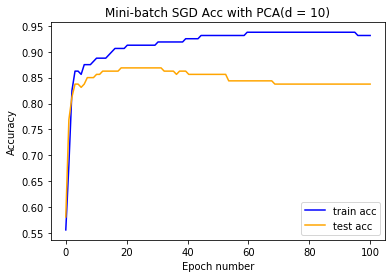

TYPE: Mini-batch SGD Acc with PCA(d = 10)
Training ACC: 0.93125
Test ACC: 0.8375


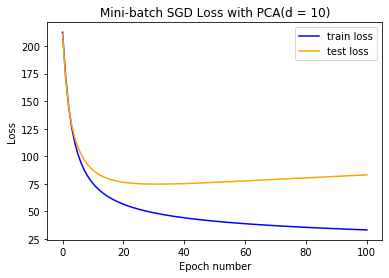

In [31]:
#d = 10
result_list_minibatch = logistic_regression_train(w = int_weight(10),x = x_train_d10,t = t_train,batch_size = 32,epoch = 100 ,x_test = x_test_d10 ,t_test = t_test,lr = 0.08)
epmini = np.linspace(0,100,100)
plt.plot(epmini,result_list_minibatch[0],color = 'blue',label = 'train acc')
plt.plot(epmini,result_list_minibatch[2],color = 'orange',label = 'test acc')
plt.title('Mini-batch SGD Acc with PCA(d = 10)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: Mini-batch SGD Acc with PCA(d = 10)')
print('Training ACC:',result_list_minibatch[0][-1])
print('Test ACC:',result_list_minibatch[2][-1])

plt.plot(epmini,result_list_minibatch[1],color = 'blue',label = 'train loss')
plt.plot(epmini,result_list_minibatch[3],color = 'orange',label = 'test loss')
plt.title('Mini-batch SGD Loss with PCA(d = 10)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Newton with PCA

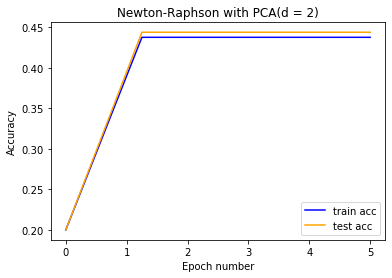

TYPE: Newton-Raphson with PCA(d = 2)
Training ACC: 0.4375
Test ACC: 0.44375


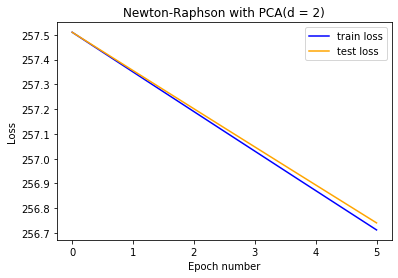

In [32]:
# d = 2

result_list_nt = logistic_regression_nt(w = int_weight(2),x = x_train_d2,t = t_train,x_test = x_test_d2,t_test = t_test,batch_size = 160,epoch =5)
epnt = np.linspace(0,5,5)

plt.plot(epnt,result_list_nt[0],color = 'blue',label = 'train acc')
plt.plot(epnt,result_list_nt[2],color = 'orange',label = 'test acc')
plt.title('Newton-Raphson with PCA(d = 2)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: Newton-Raphson with PCA(d = 2)')
print('Training ACC:',result_list_nt[0][-1])
print('Test ACC:',result_list_nt[2][-1])

plt.plot(epnt,result_list_nt[1],color = 'blue',label = 'train loss')
plt.plot(epnt,result_list_nt[3],color = 'orange',label = 'test loss')
plt.title('Newton-Raphson with PCA(d = 2)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

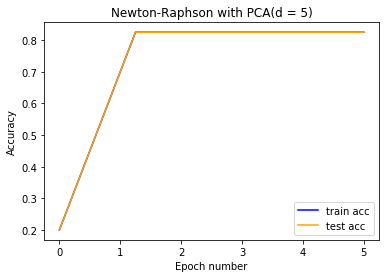

TYPE: Newton-Raphson with PCA(d = 5)
Training ACC: 0.825
Test ACC: 0.825


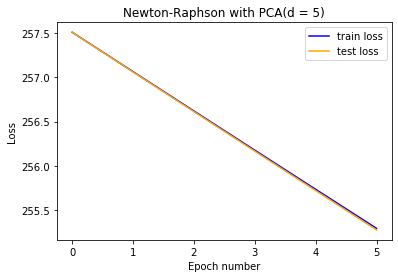

In [33]:
# d = 5

result_list_nt = logistic_regression_nt(w = int_weight(5),x = x_train_d5,t = t_train,x_test = x_test_d5,t_test = t_test,batch_size = 160,epoch =5)
epnt = np.linspace(0,5,5)

plt.plot(epnt,result_list_nt[0],color = 'blue',label = 'train acc')
plt.plot(epnt,result_list_nt[2],color = 'orange',label = 'test acc')
plt.title('Newton-Raphson with PCA(d = 5)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: Newton-Raphson with PCA(d = 5)')
print('Training ACC:',result_list_nt[0][-1])
print('Test ACC:',result_list_nt[2][-1])

plt.plot(epnt,result_list_nt[1],color = 'blue',label = 'train loss')
plt.plot(epnt,result_list_nt[3],color = 'orange',label = 'test loss')
plt.title('Newton-Raphson with PCA(d = 5)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

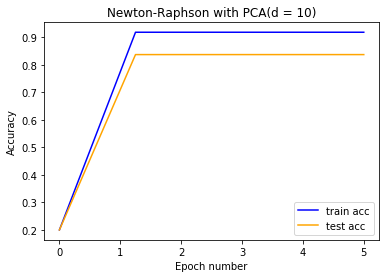

TYPE: Newton-Raphson with PCA(d = 10)
Training ACC: 0.91875
Test ACC: 0.8375


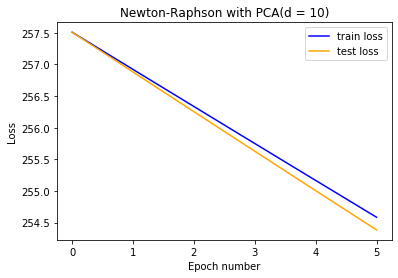

In [34]:
# d = 10

result_list_nt = logistic_regression_nt(w = int_weight(10),x = x_train_d10,t = t_train,x_test = x_test_d10,t_test = t_test,batch_size = 160,epoch =5)
epnt = np.linspace(0,5,5)

plt.plot(epnt,result_list_nt[0],color = 'blue',label = 'train acc')
plt.plot(epnt,result_list_nt[2],color = 'orange',label = 'test acc')
plt.title('Newton-Raphson with PCA(d = 10)')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('TYPE: Newton-Raphson with PCA(d = 10)')
print('Training ACC:',result_list_nt[0][-1])
print('Test ACC:',result_list_nt[2][-1])

plt.plot(epnt,result_list_nt[1],color = 'blue',label = 'train loss')
plt.plot(epnt,result_list_nt[3],color = 'orange',label = 'test loss')
plt.title('Newton-Raphson with PCA(d = 10)')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Top EigenVectors

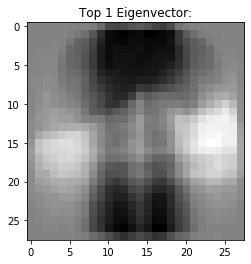

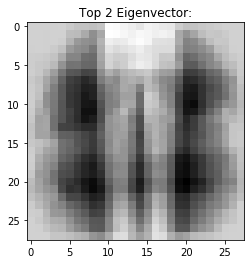

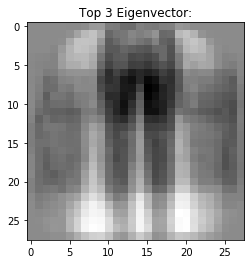

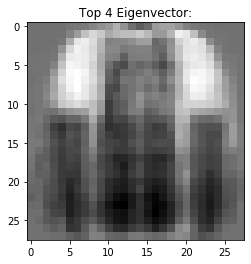

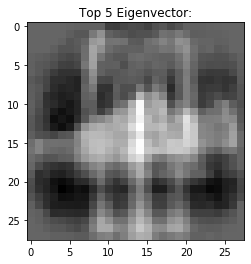

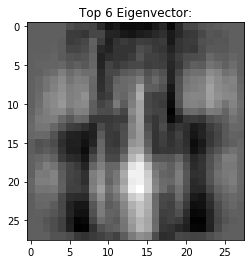

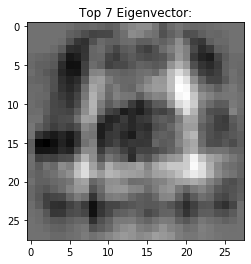

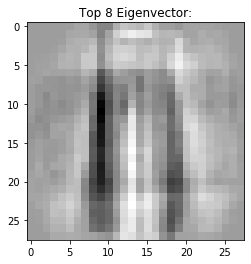

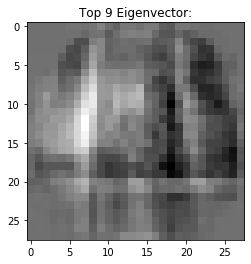

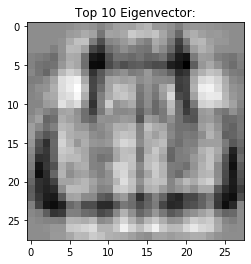

In [35]:
d = 10
e_v = get_top_d_eigvector(x_train,d)
e_v = e_v.reshape(d,784)
for i in range(d):
    Min = np.min(e_v[i])
    Max = np.max(e_v[i])
    R = Max-Min
    for j in range(784):
        e_v[i][j] = ((e_v[i][j] - Min) / R) * 255
        e_v[i][j] = int(e_v[i][j])
for i in range(d):
    img = e_v[i].reshape((28,28))
    plt.imshow(img, cmap = "gray") 
    plt.title("Top "+str(i+1)+" Eigenvector:")
    plt.show()

# Plot the decision regions and data points 

In [36]:
x_train_d3 = []
x_train_d6 = []
x_test_d3 = []
x_test_d6 = []

d = 3
ev_train = get_eigvector(x_train,d)
x_train_d3a = PCA(x_train,ev_train,d)
x_test_d3a = PCA(x_test,ev_train,d)

for i in range(0,160):
    for j in range(0,1):
        x_train_d3.append(x_train_d3a[i][j])
for i in range(0,160):
    for j in range(0,1):
        x_test_d3.append(x_test_d3a[i][j])
        
d = 6
ev_train = get_eigvector(x_train,d)
x_train_d6a = PCA(x_train,ev_train,d)
x_test_d6a = PCA(x_test,ev_train,d)

for i in range(0,160):
    for j in range(0,1):
        x_train_d6.append(x_train_d6a[i][j])
for i in range(0,160):
    for j in range(0,1):
        x_test_d6.append(x_test_d6a[i][j])
        

In [94]:
def normalize(a):
    Max = np.max(a)
    Min = np.min(a)
    Range = Max-Min
    a_ = a - Min
    a_ = a_ / Range
    return a_

In [111]:
#get weights
w1 = []
w2 = []
one = np.ones(160)
X = np.insert(x_train_d2,0,one,axis=1)
#X = X.reshape((160,1,3))
result_list_nt = logistic_regression_nt(w = int_weight(3),x = X,t = t_train,x_test = x_test_d3,t_test = t_test,batch_size = 160,epoch =5)
w1a = result_list_nt[4]
for i in range(len(w1a)):
    for j in range(len(w1a[0])):
        w1.append(w1a[i][j])
w1 = np.array(w1)


In [112]:
tmpa = []
for i in range(0,len(x_train_d3)):
    tmpa.append(x_test_d3[i][1])
#print(tmpa)
tmpa = np.array(tmpa)

a_2 = tmpa**2
b_2 = a_2
ab = a_2
a_2 = normalize(a_2)
b_2 = normalize(b_2)
ab = normalize(ab)
p3 = x_train_d3 
#print(ab.shape)
p3 = np.insert(p3,3,a_2,axis=1)
p3 = np.insert(p3,4,ab,axis=1)
p3 = np.insert(p3,5,b_2,axis=1)
p3 = p3.reshape((160,6))
result_list_nt = logistic_regression_nt(w = int_weight(6),x = p3,t = t_train,x_test = x_test_d6,t_test = t_test,batch_size = 160,epoch =5)
w2a = result_list_nt[4]
for i in range(len(w2a)):
    for j in range(len(w2a[0])):
        w2.append(w2a[i][j])
w2 = np.array(w2)

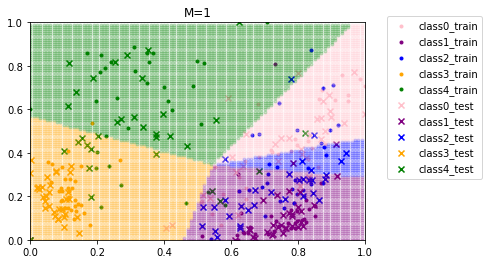

In [97]:
#依照class分類pca後的數據
#d = 2 
#train
#M = 1

class0 = []
class1 = []
class2 = []
class3 = []
class4 = []

for i in range(160):
    t_index = np.argmax(t_train[i])
    #print(t_index)
    if t_index == 0:
        class0.append(x_train_d2[i])  
    elif t_index == 1:
        class1.append(x_train_d2[i])
    elif t_index == 2:
        class2.append(x_train_d2[i])
    elif t_index == 3:
        class3.append(x_train_d2[i])
    elif t_index == 4:
        class4.append(x_train_d2[i])
class0 = np.array(class0)
class1 = np.array(class1)
class2 = np.array(class2)
class3 = np.array(class3)
class4 = np.array(class4)
#print(class0[:][0])
for i in range(0,len(class0)):
    plt.scatter(class0[i][0],class0[i][1],color='pink',marker='.')
for i in range(0,len(class1)):
    plt.scatter(class1[i][0],class1[i][1],color='purple',marker='.')
for i in range(0,len(class2)):
    plt.scatter(class2[i][0],class2[i][1],color='blue',marker='.')
for i in range(0,len(class3)):
    plt.scatter(class3[i][0],class3[i][1],color='orange',marker='.')
for i in range(0,len(class4)):
    plt.scatter(class4[i][0],class4[i][1],color='green',marker='.')
plt.scatter(0,0,color='pink',marker='.',label='class0_train')
plt.scatter(0,0,color='purple',marker='.',label='class1_train')
plt.scatter(0,0,color='blue',marker='.',label='class2_train')
plt.scatter(0,0,color='orange',marker='.',label='class3_train')
plt.scatter(0,0,color='green',marker='.',label='class4_train')
##test##

class0 = []
class1 = []
class2 = []
class3 = []
class4 = []
for i in range(160):
    t_index = np.argmax(t_test[i])
    if t_index == 0:
        class0.append(x_test_d2[i])  
    elif t_index == 1:
        class1.append(x_test_d2[i])
    elif t_index == 2:
        class2.append(x_test_d2[i])
    elif t_index == 3:
        class3.append(x_test_d2[i])
    elif t_index == 4:
        class4.append(x_test_d2[i])
class0 = np.array(class0)
class1 = np.array(class1)
class2 = np.array(class2)
class3 = np.array(class3)
class4 = np.array(class4)

for i in range(0,len(class0)):
    plt.scatter(class0[i][0],class0[i][1],color='pink',marker='x')
for i in range(0,len(class1)):
    plt.scatter(class1[i][0],class1[i][1],color='purple',marker='x')
for i in range(0,len(class2)):
    plt.scatter(class2[i][0],class2[i][1],color='blue',marker='x')
for i in range(0,len(class3)):
    plt.scatter(class3[i][0],class3[i][1],color='orange',marker='x')
for i in range(0,len(class4)):
    plt.scatter(class4[i][0],class4[i][1],color='green',marker='x')
plt.scatter(0,0,color='pink',marker='x',label='class0_test')
plt.scatter(0,0,color='purple',marker='x',label='class1_test')
plt.scatter(0,0,color='blue',marker='x',label='class2_test')
plt.scatter(0,0,color='orange',marker='x',label='class3_test')
plt.scatter(0,0,color='green',marker='x',label='class4_test')

# Plot decision region
P = 100
for i in range(P):
    for j in range(P):
        a = [1,i/P,j/P]
        a = np.array(a)
        w1 = np.array(w1)
        vals = np.dot(w1,a)
        #print(vals)
        Max = -sys.maxsize
        idx = -1
        for k in range(5):
            if(vals[k] > Max):
                idx = k
                Max = vals[k]
        if(idx == 0):
            plt.plot(i/P,j/P,color='pink',marker='.',alpha=0.2)
        elif(idx == 1):
            plt.plot(i/P,j/P,color='purple',marker='.',alpha=0.2)
        elif(idx == 2):
            plt.plot(i/P,j/P,color='blue',marker='.',alpha=0.2)
        elif(idx == 3):
            plt.plot(i/P,j/P,color='orange',marker='.',alpha=0.2)
        elif(idx == 4):
            plt.plot(i/P,j/P,color='green',marker='.',alpha=0.2)
#
plt.ylim(0,1.0)
plt.xlim(0,1.0)
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title('M=1')
plt.show()


#問題：點分布相反 

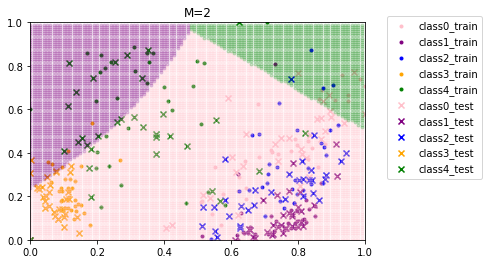

In [114]:
#train
#M = 2

class0 = []
class1 = []
class2 = []
class3 = []
class4 = []

for i in range(160):
    t_index = np.argmax(t_train[i])
    if t_index == 0:
        class0.append(x_train_d6[i])  
    elif t_index == 1:
        class1.append(x_train_d6[i])
    elif t_index == 2:
        class2.append(x_train_d6[i])
    elif t_index == 3:
        class3.append(x_train_d6[i])
    elif t_index == 4:
        class4.append(x_train_d6[i])
class0 = np.array(class0)
class1 = np.array(class1)
class2 = np.array(class2)
class3 = np.array(class3)
class4 = np.array(class4)
for i in range(0,len(class0)):
    plt.scatter(class0[i][0],class0[i][1],color='pink',marker='.')
for i in range(0,len(class1)):
    plt.scatter(class1[i][0],class1[i][1],color='purple',marker='.')
for i in range(0,len(class2)):
    plt.scatter(class2[i][0],class2[i][1],color='blue',marker='.')
for i in range(0,len(class3)):
    plt.scatter(class3[i][0],class3[i][1],color='orange',marker='.')
for i in range(0,len(class4)):
    plt.scatter(class4[i][0],class4[i][1],color='green',marker='.')
plt.scatter(0,0,color='pink',marker='.',label='class0_train')
plt.scatter(0,0,color='purple',marker='.',label='class1_train')
plt.scatter(0,0,color='blue',marker='.',label='class2_train')
plt.scatter(0,0,color='orange',marker='.',label='class3_train')
plt.scatter(0,0,color='green',marker='.',label='class4_train')
##test##

class0 = []
class1 = []
class2 = []
class3 = []
class4 = []
for i in range(160):
    t_index = np.argmax(t_test[i])
    if t_index == 0:
        class0.append(x_test_d6[i])  
    elif t_index == 1:
        class1.append(x_test_d6[i])
    elif t_index == 2:
        class2.append(x_test_d6[i])
    elif t_index == 3:
        class3.append(x_test_d6[i])
    elif t_index == 4:
        class4.append(x_test_d6[i])
class0 = np.array(class0)
class1 = np.array(class1)
class2 = np.array(class2)
class3 = np.array(class3)
class4 = np.array(class4)

for i in range(0,len(class0)):
    plt.scatter(class0[i][0],class0[i][1],color='pink',marker='x')
for i in range(0,len(class1)):
    plt.scatter(class1[i][0],class1[i][1],color='purple',marker='x')
for i in range(0,len(class2)):
    plt.scatter(class2[i][0],class2[i][1],color='blue',marker='x')
for i in range(0,len(class3)):
    plt.scatter(class3[i][0],class3[i][1],color='orange',marker='x')
for i in range(0,len(class4)):
    plt.scatter(class4[i][0],class4[i][1],color='green',marker='x')
plt.scatter(0,0,color='pink',marker='x',label='class0_test')
plt.scatter(0,0,color='purple',marker='x',label='class1_test')
plt.scatter(0,0,color='blue',marker='x',label='class2_test')
plt.scatter(0,0,color='orange',marker='x',label='class3_test')
plt.scatter(0,0,color='green',marker='x',label='class4_test')

# Plot decision region
P = 100
for i in range(P):
    for j in range(P):
        vals = np.dot(w2,[1,i/P,j/P,i*i/P/P,i*j/P/P,j*j/P/P])
        Max = -sys.maxsize
        idx = -1
        for k in range(5):
            if(vals[k] > Max):
                idx = k
                Max = vals[k]
        if(idx == 0):
            plt.plot(i/P,j/P,color='pink',marker='.',alpha=0.2)
        elif(idx == 1):
            plt.plot(i/P,j/P,color='purple',marker='.',alpha=0.2)
        elif(idx == 2):
            plt.plot(i/P,j/P,color='blue',marker='.',alpha=0.2)
        elif(idx == 3):
            plt.plot(i/P,j/P,color='orange',marker='.',alpha=0.2)
        elif(idx == 4):
            plt.plot(i/P,j/P,color='green',marker='.',alpha=0.2)
#
plt.ylim(0,1.0)
plt.xlim(0,1.0)
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title('M=2')
plt.show()